# Error progation with correlated variables

The dataset in *sand.txt* reports the slope of a beach (2nd column) as a function of the diameter of its sand granules (in mm) (1st column). The third column
reports the uncertainty on the slope.
We assume a simple linear relation between the two variables, the data was fitted with a straight line:  $$y = m \cdot x + q$$
The best values for the parameters are:
* m = 16.1 ± 1.0 mm−1,
* q = −2.61 ± 0.34,

while the covariance matrix for the two is:
$$
\left[
\begin{array}{cc}
    1.068 & -0.302 \\
    -0.302 & 0.118 \\
\end{array}
\right]
$$





In [3]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Let's first plot the data with error bars and a fitted line:

Text(0.5, 1.0, 'linear "prediction" of slope')

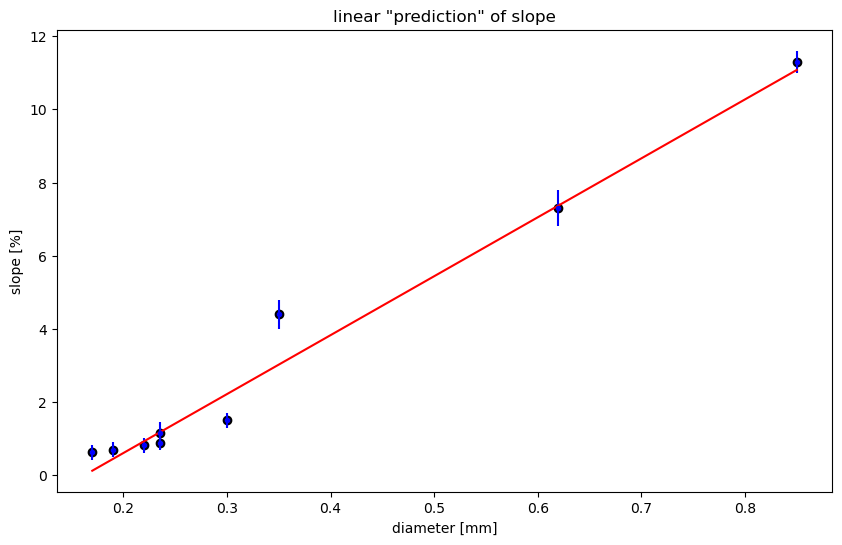

In [6]:
# function for the fit
def linear(x, m, q):
    """Linear function

    Returns the linear function of x with slope m and intercept q.

    .. math::
        f(x) = m x + q

    Args:
        x (float): x value
        m (float): slope
        q (float): y-intercept
    """
    return m * x + q

# loading data
data = np.loadtxt('sand.txt')

diameter = data[:, 0]
slope = data[:, 1]
slope_err = data[:, 2]

# covariance matrix pcov and best fit terms from exercise sheet
pcov = np.array([[1.068, -0.302], [-0.302, 0.118]])
m , q  = 16.1, -2.61


# plot the data
plt.figure(figsize = (10, 6))
plt.errorbar(diameter, slope, yerr = slope_err, fmt='b.')
plt.scatter(diameter, slope, color = "k")# plat the data with errorbars
plt.plot(diameter, linear(diameter, m, q), 'r-')  # plot the fit
# add labels, titel etc.
plt.xlabel('diameter [mm]')
plt.ylabel('slope [%]')
plt.title('linear "prediction" of slope')

Disregarding the correlation between the variables m and q, we calculate the slope of a beach whose sand grains have the diameter of 1.5 mm. Then, we report the number with the corresponding uncertainty.

In [8]:
# we define a function to compute the linear uncertainty
def linear_uncertainty(dev1, dev2, cov, dependence = False):
    tot_uncertainty = (dev1 ** 2 * cov[0][0]) + (dev2 ** 2 * cov[1][1]) # without dependence of variables

    if dependence == True:
        tot_uncertainty = tot_uncertainty + (2 * dev1 * dev2 * cov[0][1]) # with dependence of variables

    tot_uncertainty = (tot_uncertainty) ** 0.5

    return tot_uncertainty

x = 1.5 # diameter given in exercise
central_value = linear(x, m, q) # function call
dev_q = 1 # derivative of mx+q derived for q
dev_m = x # derviative of mx+q derived for m
uncertainty_without = linear_uncertainty(dev_m, dev_q, pcov, dependence = False)
uncertainty_with = linear_uncertainty(dev_m, dev_q, pcov, dependence=True)
print("The slope disregarding the correlation is {} +/- {}".format(round(central_value, 2), round(uncertainty_without, 1)))

The slope disregarding the correlation is 21.54 +/- 1.6


We repeat this task, but this time taking into account the correlation between m and q. In which case is the uncertainty on the extrapolated value smaller?

In [10]:
 x = 1.5 # diameter given in exercise
central_value = linear(x, m, q) # function call
dev_q = 1 # derivative of mx+q derived for q
dev_m = x # derviative of mx+q derived for m
uncertainty_without = linear_uncertainty(dev_m, dev_q, pcov, dependence = False)
uncertainty_with = linear_uncertainty(dev_m, dev_q, pcov, dependence=True)
print("The slope disregarding the correlation is {} +/- {}".format(round(central_value, 2), round(uncertainty_without, 1)))
print("The slope including the correlation is {} +/- {}".format(round(central_value, 2), round(uncertainty_with, 1)))

The slope disregarding the correlation is 21.54 +/- 1.6
The slope including the correlation is 21.54 +/- 1.3


#### Conclusion
 It makes sense that the uncertainty decreases when one includes the  correlation term, because this way we include more information on uncertainty of  the data. Including more information means narrower error/ higher precision.
